## Import required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## We first import the csv files into pandas dataframes.

In [4]:
# Import dataset 'a'
df_label_a= pd.read_csv("a.lbl.csv")
df_sensor_a = pd.read_csv("a.sensor.csv") 

# df_label_a.head()
# df_sensor_a.describe()

# Import dataset 'm'
df_label_m = pd.read_csv("m.lbl.csv")
df_sensor_m = pd.read_csv("m.sensor.csv") 

# df_label_m.head()
# df_sensor_m.head()

# Import dataset 'p'
df_label_p = pd.read_csv("p.lbl.csv")
df_sensor_p = pd.read_csv("p.sensor.csv") 

df_label_p.head()

,timestamp(ms),label (0=start 1=end 2=cancel)
0,1396962384114,0
1,1396962384678,1
2,1396962388162,0
3,1396962388860,1
4,1396962390258,0


In [5]:
df_sensor_p.head()

,timestamp(ms),acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec)
0,1396961349976,0.0015,0.0010,0.0113,-0.0072,0.0253,-1.6704,0.0019,0.0019,-0.0008
1,1396961350442,-0.0013,0.0017,0.0093,-0.0073,0.0250,-1.6706,-0.0031,-0.0031,-0.0070
2,1396961350443,-0.0008,-0.0000,0.0123,-0.0068,0.0251,-1.6707,-0.0006,-0.0006,-0.0009
3,1396961350444,0.0021,0.0036,0.0093,-0.0068,0.0250,-1.6708,0.0007,0.0007,-0.0069
4,1396961350445,-0.0016,-0.0002,0.0152,-0.0070,0.0249,-1.6711,-0.0105,-0.0105,-0.0022


## Make a new boolean column in the sensor dataframes which will store True if the sensor data row represents shake and False if it does not represent shake.
For each timestamp (say t_current) in the sensor data, from the label data we find the largest timestamp which is smaller than t_current (say t_before) and the smallest timestamp which is larger than t_current (say t_after). So, we now have the interval (t_before, t_current, t_after).

- Case 1: t_before has label '0' and t_after has label '1', then t_current represents phone shake data.
- Case 2: t_before has label '1' and t_after has label '0', then t_current does not represent phone shake data.
- Case 3: t_before does not exist or t_after does not exist, then t_current does not represent phone shake data.

In [6]:
# Add is_shake column for sensor 'a'
shake_column = []
for lab,row in df_sensor_a.iterrows():
    t_current = row["timestamp(ms)"]
    
    # Find t_before and t_after
    t_before=0
    row_label_before=None
    
    t_after=np.inf
    row_label_after=None
    
    for lab,row in df_label_a.iterrows():
        if row["timestamp(ms)"] <= t_current:
            # Find maximum time stamp which is lower than t_current
            if row["timestamp(ms)"] > t_before:
                t_before = row["timestamp(ms)"]
                row_label_before = lab

        if row["timestamp(ms)"] >= t_current:
            # Find minimum time stamp which is higher than t_current
            if row["timestamp(ms)"] < t_after:
                t_after = row["timestamp(ms)"]
                row_label_after=lab    
    
    # Case 3:
    if row_label_before == None or row_label_after == None:
        shake_column.append(False)
    else:
        # print(t_current, df_label_a.loc[row_label_before][1],df_label_a.loc[row_label_after][1])
        # Case 1:
        if df_label_a.loc[row_label_before][1] == 0 and df_label_a.loc[row_label_after][1] == 1:
            shake_column.append(True)
        # Case 2:    
        elif df_label_a.loc[row_label_before][1] == 1 and df_label_a.loc[row_label_after][1] == 0:
            shake_column.append(False)
        # Takes care of case when t_current timestamp is present in label data
        elif df_label_a.loc[row_label_before][1] == df_label_a.loc[row_label_after][1]:
            shake_column.append(True)

df_sensor_a["is_shake"]=shake_column

In [9]:
# Write the sensor 'a' data with the is_shake column in a new csv file.
df_sensor_a.to_csv('sensor_a_with_shake.csv',index=False)

In [10]:
# Add is_shake column for sensor 'm'
shake_column = []
for lab,row in df_sensor_m.iterrows():
    t_current = row["timestamp(ms)"]
    
    # Find t_before and t_after
    t_before=0
    row_label_before=None
    
    t_after=np.inf
    row_label_after=None
    for lab,row in df_label_m.iterrows():
        if row["timestamp(ms)"] <= t_current:
            # Find maximum time stamp which is lower than t_current
            if row["timestamp(ms)"] > t_before:
                t_before = row["timestamp(ms)"]
                row_label_before = lab

        if row["timestamp(ms)"] >= t_current:
            # Find minimum time stamp which is higher than t_current
            if row["timestamp(ms)"] < t_after:
                t_after = row["timestamp(ms)"]
                row_label_after=lab    
    
    # Case 3:
    if row_label_before == None or row_label_after == None:
        shake_column.append(False)
    else:
        # Case 1:
        if df_label_m.loc[row_label_before][1] == 0 and df_label_m.loc[row_label_after][1] == 1:
            shake_column.append(True)
        # Case 2:    
        elif df_label_m.loc[row_label_before][1] == 1 and df_label_m.loc[row_label_after][1] == 0:
            shake_column.append(False)
        # Takes care of case when t_current timestamp is present in label data
        elif df_label_m.loc[row_label_before][1] == df_label_m.loc[row_label_after][1]:
            shake_column.append(True)

df_sensor_m["is_shake"]=shake_column

In [11]:
# Write the sensor 'm' data with the is_shake column in a new csv file.
df_sensor_m.to_csv('sensor_m_with_shake.csv',index=False)

In [12]:
# Add is_shake column for sensor 'p'
shake_column = []
for lab,row in df_sensor_p.iterrows():
    t_current = row["timestamp(ms)"]
    
    # Find t_before and t_after
    t_before=0
    row_label_before=None
    
    t_after=np.inf
    row_label_after=None
    for lab,row in df_label_p.iterrows():
        if row["timestamp(ms)"] <= t_current:
            # Find maximum time stamp which is lower than t_current
            if row["timestamp(ms)"] > t_before:
                t_before = row["timestamp(ms)"]
                row_label_before = lab

        if row["timestamp(ms)"] >= t_current:
            # Find minimum time stamp which is higher than t_current
            if row["timestamp(ms)"] < t_after:
                t_after = row["timestamp(ms)"]
                row_label_after=lab    
    
    # Case 3:
    if row_label_before == None or row_label_after == None:
        shake_column.append(False)
    else:
        # Case 1:
        if df_label_p.loc[row_label_before][1] == 0 and df_label_p.loc[row_label_after][1] == 1:
            shake_column.append(True)
        # Case 2:    
        elif df_label_p.loc[row_label_before][1] == 1 and df_label_p.loc[row_label_after][1] == 0:
            shake_column.append(False)
        # Takes care of case when t_current timestamp is present in label data
        elif df_label_p.loc[row_label_before][1] == df_label_p.loc[row_label_after][1]:
            shake_column.append(True)
        # Takes care of case when t_current timestamp is present in label data
        elif df_label_p.loc[row_label_before][1] == df_label_p.loc[row_label_after][1]:
            shake_column.append(True)
            
df_sensor_p["is_shake"]=shake_column

In [13]:
# Write the sensor 'p' data with the is_shake column in a new csv file.
df_sensor_p.to_csv('sensor_p_with_shake.csv',index=False)

## Now that we have saved the shake categorization in csv format. We will read those directly. So that we don't have to regenerate them in the future.

In [6]:
df_shake_sensor_a = pd.read_csv('sensor_a_with_shake.csv')
df_shake_sensor_m = pd.read_csv('sensor_m_with_shake.csv')
df_shake_sensor_p = pd.read_csv('sensor_p_with_shake.csv')

In [7]:
df_shake_sensor_a.head()

,timestamp(ms),acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec),is_shake
0,1397019805843,0.0809,-0.2223,0.2055,0.4154,-1.0777,-2.4263,-0.2120,-0.2120,0.3575,False
1,1397019805942,0.0505,-0.1454,0.0934,0.4797,-1.0745,-2.3135,-0.0847,-0.0847,0.6287,False
2,1397019806040,0.1952,0.5475,-0.0295,0.5663,-1.0610,-2.1922,-0.2483,-0.2483,0.4558,False
3,1397019806139,-0.0578,0.1958,0.0850,0.6059,-1.0666,-2.1255,-0.0796,-0.0796,0.0817,False
4,1397019806237,0.0800,-0.1689,-0.2530,0.5836,-1.0347,-2.1527,0.6329,0.6329,0.0925,False


## Now we can start implementing different classifier machine learning model

In [3]:
x_train = df_shake_sensor_p[df_shake_sensor_p.columns[1:-1]]
y_train = df_shake_sensor_p[df_shake_sensor_p.columns[-1]]

x_test = df_shake_sensor_m[df_shake_sensor_m.columns[1:-1]]
y_test = df_shake_sensor_m[df_shake_sensor_m.columns[-1]]

## Logistic Regression model

Accuracy of Prediction:  95.2356389214537 %


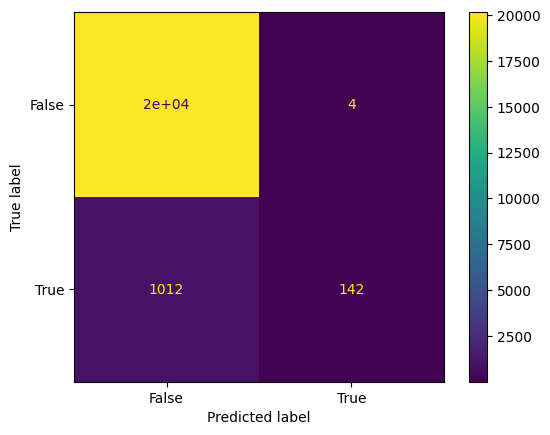

In [4]:
# Import model from sklearn module

from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)  

# Train model on training data
classifier.fit(x_train, y_train)

# Test model on test data
y_pred = classifier.predict(x_test)

# Plot confusion matrix and calculate accuracy 100*(Total Correct)/Total
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print("Accuracy of Prediction: ", 100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]),"%")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

## k-Nearest Neighbour

Accuracy of Prediction:  94.85580304806565 %


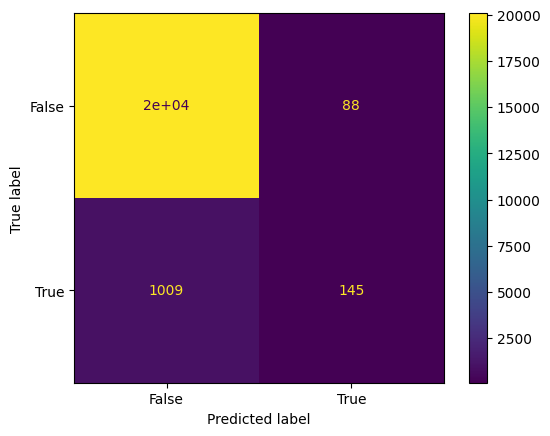

In [6]:
# Import model from sklearn module

from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )  

# Train model on training data
classifier.fit(x_train, y_train)  

# Test model on test data
y_pred = classifier.predict(x_test)

# Plot confusion matrix and calculate accuracy 100*(Total Correct)/Total
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print("Accuracy of Prediction: ", 100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]),"%")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

## Support Vector Machine

Accuracy of Prediction:  94.58851113716295 %


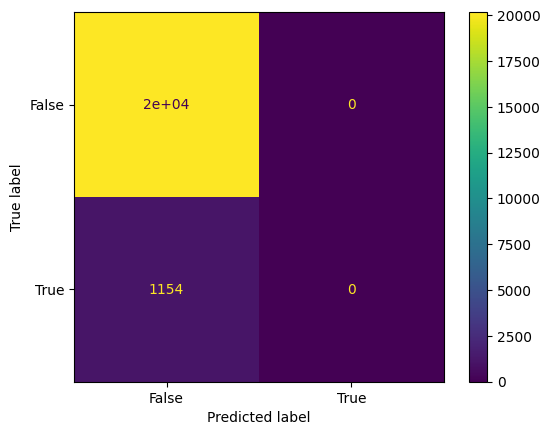

In [5]:
# Import model from sklearn module

from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  

# Train model on training data
classifier.fit(x_train, y_train)

# Test model on test data
y_pred = classifier.predict(x_test)

# Plot confusion matrix and calculate accuracy 100*(Total Correct)/Total
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print("Accuracy of Prediction: ", 100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]),"%")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

## Naïve Bayes Classifier

Accuracy of Prediction:  91.96717467760844 %


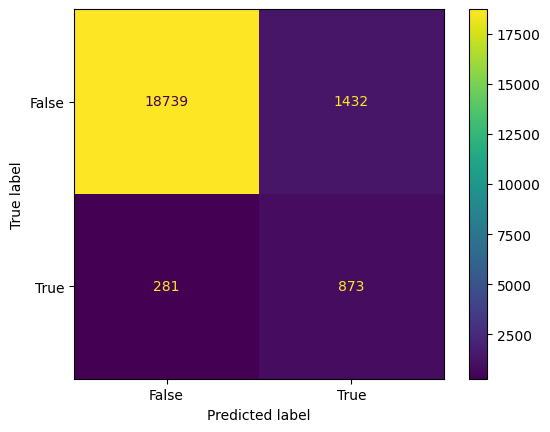

In [7]:
# Import model from sklearn module

from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  

# Train model on training data
classifier.fit(x_train, y_train)  

# Test model on test data
y_pred = classifier.predict(x_test)

# Plot confusion matrix and calculate accuracy 100*(Total Correct)/Total
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print("Accuracy of Prediction: ", 100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]),"%")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

## Conclusions
- Accuracy:
	- Logistical Regression: 95.23 %
	- k-Nearest Neighbour: 94.85 %
	- Support Vector Machine: 94.58 %
	- Naive Bayes Classifier: 91.96 %

## Scope Of Improvement
- While machine learning classifiers have been used and compared here, an in-depth understanding of the underlying mathematics and algorithms of machine learning models is required.